In [1]:
#importing libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
#loading dataset
dataset = pd.read_csv('Crimes_2001_to_2022.csv',low_memory=False)
 
dataset.head(10)

# dataset.dtypes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,9/5/2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,2/10/2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,9/4/2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,6,1138875.0,1904869.0,2015,2/10/2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,9/1/2018 0:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
3,10224740,HY411595,9/5/2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,2/10/2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,9/5/2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,2/10/2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,9/5/2015 10:55,082XX S LOOMIS BLVD,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,5,1168430.0,1850165.0,2015,2/10/2018 15:50,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743,HY411629,9/4/2015 18:00,021XX W CHURCHILL ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,24.0,5,1161628.0,1912157.0,2015,2/10/2018 15:50,41.914636,-87.681631,"(41.914635603, -87.681630909)"
7,10224744,HY411605,9/5/2015 13:00,025XX W CERMAK RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,25.0,31.0,6,1159734.0,1889313.0,2015,9/17/2015 11:37,41.851989,-87.689219,"(41.851988885, -87.689219118)"
8,10224745,HY411654,9/5/2015 11:30,031XX W WASHINGTON BLVD,320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,True,...,27.0,27.0,3,1155536.0,1900515.0,2015,2/10/2018 15:50,41.882814,-87.704326,"(41.88281374, -87.704325717)"
9,11645836,JC212333,5/1/2016 0:25,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,4/6/2019 16:04,NaN,NaN,NaN


In [3]:
# droping the features that are not usefull
dataset=dataset.drop(columns=['ID','Case Number','Description','Updated On','Block'])
# X.shape

print('Columns in dataset: ', dataset.columns)


dataset


Columns in dataset:  Index(['Date', 'IUCR', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,9/1/2018 0:01,810,THEFT,RESIDENCE,False,True,631,6.0,8.0,44.0,6,NaN,NaN,2018,NaN,NaN,NaN
3,9/5/2015 12:45,2023,NARCOTICS,SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1/4/2001 22:30,910,MOTOR VEHICLE THEFT,STREET,False,False,621,6.0,NaN,NaN,7,1174377.0,1852400.0,2001,41.750382,-87.636574,"(41.75038194, -87.636573873)"
1048571,1/1/2001 6:42,460,BATTERY,CHA PARKING LOT/GROUNDS,False,False,925,9.0,NaN,NaN,08B,1175232.0,1879394.0,2001,41.824437,-87.632635,"(41.824437264, -87.632634617)"
1048572,1/3/2001 19:41,460,BATTERY,RESIDENCE,False,True,1423,14.0,NaN,NaN,08B,1158628.0,1907919.0,2001,41.903068,-87.692769,"(41.903068216, -87.692768777)"
1048573,1/4/2001 17:10,320,ROBBERY,SIDEWALK,False,False,221,2.0,NaN,NaN,3,1178659.0,1873955.0,2001,41.809435,-87.620228,"(41.809434812, -87.620227735)"


In [4]:
# count the number of rows that contain missing values:
dataset.isna().any(axis=1).sum()


33328

In [5]:
# droping the null value enteries 
dataset.dropna(inplace=True)

In [6]:
# counts after removal of null values from dataset
np.count_nonzero(dataset.isnull())

0

In [7]:
dataset

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,9/5/2015 12:45,2023,NARCOTICS,SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,9/5/2015 10:55,610,BURGLARY,RESIDENCE,False,False,614,6.0,21.0,71.0,5,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048205,1/3/2001 6:00,910,MOTOR VEHICLE THEFT,STREET,False,False,2533,25.0,37.0,25.0,7,1141728.0,1910856.0,2001,41.911457,-87.754774,"(41.911457184, -87.75477368)"
1048464,1/29/2019 19:00,910,MOTOR VEHICLE THEFT,STREET,False,False,2533,25.0,37.0,25.0,7,1142432.0,1908180.0,2019,41.904101,-87.752254,"(41.904100882, -87.752253974)"
1048488,10/24/2019 6:36,630,BURGLARY,RESIDENTIAL YARD (FRONT/BACK),True,False,312,3.0,20.0,42.0,5,1180341.0,1863044.0,2019,41.779456,-87.614393,"(41.779455579, -87.614393194)"
1048517,5/12/2015 17:58,1153,DECEPTIVE PRACTICE,BANK,False,False,632,6.0,6.0,44.0,11,1182609.0,1847455.0,2015,41.736625,-87.606561,"(41.736625423, -87.60656135)"


In [8]:
# Before removing Null values 1048575

# After removing Null value 1015247

# Total Null values removed 33328

In [9]:
#exploring location column
dataset['Location']

0          (41.815117282, -87.669999562)
1          (41.895080471, -87.765400451)
3          (41.937405765, -87.716649687)
4          (41.881903443, -87.755121152)
5          (41.744378879, -87.658430635)
                       ...              
1048205     (41.911457184, -87.75477368)
1048464    (41.904100882, -87.752253974)
1048488    (41.779455579, -87.614393194)
1048517     (41.736625423, -87.60656135)
1048542    (41.866998896, -87.730995218)
Name: Location, Length: 1015247, dtype: object

In [10]:
print('Current rows:', dataset.shape[0])
dataset = dataset[(((dataset.Latitude >= 41.64) & (dataset.Longitude <= -87.50)) | 
            ((dataset.Latitude <= 41.94) & (dataset.Longitude >= -87.94)))]
print('Rows after removing out of box points:', dataset.shape[0])

Current rows: 1015247
Rows after removing out of box points: 1015247


In [11]:
# # listing the crimes type wise with their counts
types=dataset['Primary Type'].value_counts().sort_values(ascending=False)
types

THEFT                                237702
BATTERY                              190834
CRIMINAL DAMAGE                      113285
ASSAULT                               73438
OTHER OFFENSE                         67052
DECEPTIVE PRACTICE                    65914
NARCOTICS                             53286
BURGLARY                              49698
MOTOR VEHICLE THEFT                   41399
ROBBERY                               41312
CRIMINAL TRESPASS                     25787
WEAPONS VIOLATION                     17856
OFFENSE INVOLVING CHILDREN             8360
PUBLIC PEACE VIOLATION                 6253
CRIM SEXUAL ASSAULT                    5210
INTERFERENCE WITH PUBLIC OFFICER       4520
SEX OFFENSE                            3792
PROSTITUTION                           3022
ARSON                                  1642
LIQUOR LAW VIOLATION                    894
GAMBLING                                755
KIDNAPPING                              740
STALKING                        

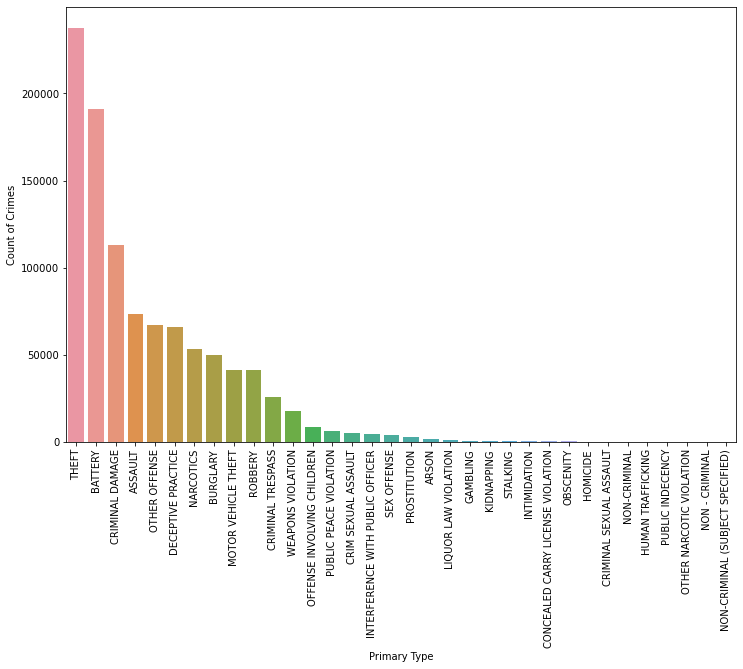

In [12]:
# plt.figure(figsize=(20,10))
# sns.countplot(data=dataset, y="Primary Type", order=dataset['Primary Type'].value_counts().index)
# plt.xticks(rotation=90)
plt.figure(figsize=(12,8))
sns.countplot(data=dataset, x="Primary Type", order=dataset['Primary Type'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('Count of Crimes')
plt.show()

In [13]:
# major crime time
#---> Storing Major Crimes
major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT']

In [14]:
# selecting the data form our dataset that belongs major crime classes
crime_df = dataset.loc[dataset['Primary Type'] .isin(major_crimes)]
crime_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,10/24/2019 8:48,486,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,08B,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)"
1047778,10/23/2019 20:00,820,THEFT,STREET,False,False,2422,24.0,49.0,1.0,6,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)"
1047805,5/13/2015 15:00,820,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,6,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)"
1047961,10/24/2019 11:45,545,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,08A,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"


In [15]:
data = crime_df.pivot_table(index='Year', columns='Primary Type', aggfunc='count')
print(data)

# since we dont have different crimes in early years so we drop data of these years

               Arrest                                       Beat           \
Primary Type  ASSAULT  BATTERY CRIMINAL DAMAGE    THEFT  ASSAULT  BATTERY   
Year                                                                        
2001              NaN      NaN             NaN      3.0      NaN      NaN   
2008              NaN      1.0             NaN      1.0      NaN      1.0   
2009              1.0      NaN             NaN      NaN      1.0      NaN   
2010              NaN      1.0             NaN      2.0      NaN      1.0   
2011              NaN      NaN             1.0      1.0      NaN      NaN   
2012              NaN      2.0             NaN      8.0      NaN      2.0   
2013              NaN      5.0             1.0     11.0      NaN      5.0   
2014              4.0     15.0             8.0     75.0      4.0     15.0   
2015           8528.0  24796.0         15503.0  30587.0   8528.0  24796.0   
2016          18060.0  49085.0         30587.0  59255.0  18060.0  49085.0   

In [16]:
# selecting the dataset which starts from 2015
crime_df=crime_df[crime_df['Year']>=2015]
crime_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,10/24/2019 8:48,486,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,08B,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)"
1047778,10/23/2019 20:00,820,THEFT,STREET,False,False,2422,24.0,49.0,1.0,6,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)"
1047805,5/13/2015 15:00,820,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,6,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)"
1047961,10/24/2019 11:45,545,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,08A,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"


In [17]:
temp=crime_df.copy()
temp

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,10/24/2019 8:48,486,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,08B,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)"
1047778,10/23/2019 20:00,820,THEFT,STREET,False,False,2422,24.0,49.0,1.0,6,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)"
1047805,5/13/2015 15:00,820,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,6,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)"
1047961,10/24/2019 11:45,545,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,08A,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"


In [18]:
def crime_type(t):
    if t =='THEFT': return '0'
    elif t =='BATTERY': return '1'
    elif t =='CRIMINAL DAMAGE': return '2'
    elif t == 'ASSAULT': return '3'
    else: return '-1'

# cp_crime = crime_df.copy()
temp['crimeType'] = temp['Primary Type'].map(crime_type)
temp=temp.drop(columns='Primary Type')
temp

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
0,9/5/2015 13:30,486,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",1
1,9/4/2015 11:30,870,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)",0
4,9/5/2015 13:00,560,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",3
7,9/5/2015 13:00,860,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)",0
10,9/5/2015 14:00,820,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,10/24/2019 8:48,486,SIDEWALK,False,True,121,1.0,42.0,28.0,08B,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)",1
1047778,10/23/2019 20:00,820,STREET,False,False,2422,24.0,49.0,1.0,6,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)",0
1047805,5/13/2015 15:00,820,SIDEWALK,False,False,823,8.0,13.0,65.0,6,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)",0
1047961,10/24/2019 11:45,545,RESIDENCE,True,False,623,6.0,6.0,69.0,08A,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)",3


In [19]:
# temp.dropna()
# drop null valules
temp.dropna(inplace=True)
temp

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
0,9/5/2015 13:30,486,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",1
1,9/4/2015 11:30,870,CTA BUS,False,False,1511,15.0,29.0,25.0,6,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)",0
4,9/5/2015 13:00,560,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",3
7,9/5/2015 13:00,860,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,6,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)",0
10,9/5/2015 14:00,820,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,6,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,10/24/2019 8:48,486,SIDEWALK,False,True,121,1.0,42.0,28.0,08B,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)",1
1047778,10/23/2019 20:00,820,STREET,False,False,2422,24.0,49.0,1.0,6,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)",0
1047805,5/13/2015 15:00,820,SIDEWALK,False,False,823,8.0,13.0,65.0,6,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)",0
1047961,10/24/2019 11:45,545,RESIDENCE,True,False,623,6.0,6.0,69.0,08A,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)",3


In [20]:
# count of null values
temp.isna().any(axis=1).sum()

0

In [21]:
# values according to their class count
count=temp['crimeType'].value_counts().sort_values(ascending=False)
count

0    237601
1    190810
2    113275
3     73433
Name: crimeType, dtype: int64

In [22]:
nrows= temp.shape[0]
portion=math.floor(nrows/3)
portion

205039

In [23]:
first=temp.iloc[0:portion,:]
first.shape

(205039, 17)

In [24]:
nextp=portion+portion+1
scnd=temp.iloc[(portion+1):nextp,:]
scnd.shape

(205039, 17)

In [25]:
finalp=nextp+portion+1
third=temp.iloc[(nextp+1):finalp,:]
third.shape

(205039, 17)

In [83]:
# picking random 5k enteries from the first part
index=np.random.choice(portion,replace=False,size = 80000)
df_frst=first.iloc[index]
df_frst.shape

(80000, 17)

In [84]:
# picking random 5k enteries from the second half

index=np.random.choice(portion,replace=False,size = 80000)
df_scnd=scnd.iloc[index]
df_scnd

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
442194,3/15/2017 13:20,1310,APARTMENT,False,False,726,7.0,15.0,67.0,14,1164115.0,1862633.0,2017,41.778685,-87.673891,"(41.778684606, -87.673891132)",2
445164,3/18/2017 17:00,1310,RESIDENCE,False,False,1723,17.0,33.0,14.0,14,1152590.0,1929262.0,2017,41.961757,-87.714382,"(41.961756704, -87.714381677)",2
543623,11/12/2017 13:40,486,SIDEWALK,True,True,611,6.0,21.0,71.0,08B,1166076.0,1851445.0,2017,41.747942,-87.667020,"(41.747941723, -87.667019666)",1
519242,6/26/2017 19:00,1320,STREET,False,False,1224,12.0,27.0,28.0,14,1166980.0,1900508.0,2017,41.882557,-87.662303,"(41.882556672, -87.66230321)",2
444106,3/17/2017 22:00,890,RESTAURANT,False,False,1214,12.0,27.0,24.0,6,1168589.0,1903631.0,2017,41.891092,-87.656304,"(41.89109173, -87.65630448)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391142,11/30/2016 14:00,560,"SCHOOL, PUBLIC, BUILDING",False,False,1634,16.0,30.0,15.0,08A,1141792.0,1921221.0,2016,41.939899,-87.754281,"(41.939898633, -87.754281422)",3
540420,11/7/2017 20:35,486,STREET,False,True,1211,12.0,26.0,24.0,08B,1157824.0,1905212.0,2017,41.895656,-87.695796,"(41.895656411, -87.695795926)",1
609054,9/19/2017 12:00,810,PARKING LOT/GARAGE(NON.RESID.),False,False,1732,17.0,35.0,21.0,6,1153099.0,1923246.0,2017,41.945238,-87.712670,"(41.945238279, -87.712670479)",0
534021,10/30/2017 12:00,486,APARTMENT,False,True,222,2.0,4.0,39.0,08B,1183163.0,1871886.0,2017,41.803654,-87.603772,"(41.803653573, -87.603772447)",1


In [85]:
# picking random 5k enteries from the third half

index=np.random.choice(portion,replace=False,size = 80000)
df_third=third.iloc[index]
df_third

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
805947,6/10/2018 19:30,051A,OTHER,False,False,1914,19.0,46.0,3.0,04A,1170862.0,1930976.0,2018,41.966078,-87.647153,"(41.96607814, -87.647153241)",3
849172,12/30/2018 0:25,520,APARTMENT,False,True,1012,10.0,24.0,29.0,04A,1149681.0,1890607.0,2018,41.855741,-87.726083,"(41.855740782, -87.726083018)",3
691970,3/31/2018 4:45,1320,STREET,False,False,1235,12.0,25.0,31.0,14,1168009.0,1890791.0,2018,41.855870,-87.658805,"(41.855870302, -87.658805093)",2
734608,12/21/2017 19:00,860,SMALL RETAIL STORE,False,False,1935,19.0,43.0,7.0,6,1171818.0,1918166.0,2017,41.930906,-87.644017,"(41.930906002, -87.644017035)",0
890023,9/30/2018 0:01,820,STREET,False,False,1831,18.0,42.0,8.0,6,1173634.0,1904417.0,2018,41.893138,-87.637753,"(41.893137832, -87.637753417)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947710,12/18/2018 13:50,460,SMALL RETAIL STORE,False,False,2512,25.0,36.0,19.0,08B,1133314.0,1916307.0,2018,41.926567,-87.785557,"(41.926566973, -87.785556627)",1
819131,6/28/2018 6:00,460,STREET,False,False,112,1.0,42.0,32.0,08B,1175960.0,1899592.0,2018,41.879846,-87.629356,"(41.879845704, -87.629356347)",1
803660,6/9/2018 0:05,486,APARTMENT,True,True,213,2.0,3.0,35.0,08B,1177828.0,1879596.0,2018,41.824933,-87.623105,"(41.824933076, -87.623104662)",1
814738,6/23/2018 4:23,820,DEPARTMENT STORE,True,False,632,6.0,6.0,44.0,6,1183071.0,1847869.0,2018,41.737751,-87.604856,"(41.737750767, -87.604855911)",0


In [86]:
# combined all three dataframe

temp_df = pd.concat([df_frst,df_scnd],ignore_index=True)
final_df = pd.concat([temp_df,df_third],ignore_index=True)
final_df

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
0,9/9/2016 15:36,1310,RESTAURANT,True,False,725,7.0,15.0,67.0,14,1166742.0,1860285.0,2016,41.772186,-87.664327,"(41.772185707, -87.664327308)",2
1,7/28/2015 12:30,560,RESIDENCE,False,True,511,5.0,9.0,49.0,08A,1176057.0,1838425.0,2015,41.711995,-87.630836,"(41.711995219, -87.630835578)",3
2,9/6/2015 10:20,1320,PARKING LOT/GARAGE(NON.RESID.),False,False,2432,24.0,40.0,1.0,14,1164409.0,1944119.0,2015,42.002282,-87.670506,"(42.002282312, -87.670505657)",2
3,11/18/2015 23:13,486,APARTMENT,True,True,722,7.0,20.0,68.0,08B,1174585.0,1863160.0,2015,41.779904,-87.635492,"(41.779904015, -87.635491778)",1
4,1/2/2016 23:00,810,DRIVEWAY - RESIDENTIAL,False,False,632,6.0,6.0,44.0,6,1181286.0,1848521.0,2016,41.739581,-87.611376,"(41.739581206, -87.611375585)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,12/18/2018 13:50,460,SMALL RETAIL STORE,False,False,2512,25.0,36.0,19.0,08B,1133314.0,1916307.0,2018,41.926567,-87.785557,"(41.926566973, -87.785556627)",1
239996,6/28/2018 6:00,460,STREET,False,False,112,1.0,42.0,32.0,08B,1175960.0,1899592.0,2018,41.879846,-87.629356,"(41.879845704, -87.629356347)",1
239997,6/9/2018 0:05,486,APARTMENT,True,True,213,2.0,3.0,35.0,08B,1177828.0,1879596.0,2018,41.824933,-87.623105,"(41.824933076, -87.623104662)",1
239998,6/23/2018 4:23,820,DEPARTMENT STORE,True,False,632,6.0,6.0,44.0,6,1183071.0,1847869.0,2018,41.737751,-87.604856,"(41.737750767, -87.604855911)",0


In [87]:
df=final_df.copy()

In [88]:
# Using PCA to combine two features

from sklearn.decomposition import PCA

location = df[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)
locat = pca.fit_transform(location)
df['Location'] = locat
df

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
0,9/9/2016 15:36,1310,RESTAURANT,True,False,725,7.0,15.0,67.0,14,1166742.0,1860285.0,2016,41.772186,-87.664327,-0.066923,2
1,7/28/2015 12:30,560,RESIDENCE,False,True,511,5.0,9.0,49.0,08A,1176057.0,1838425.0,2015,41.711995,-87.630836,-0.135721,3
2,9/6/2015 10:20,1320,PARKING LOT/GARAGE(NON.RESID.),False,False,2432,24.0,40.0,1.0,14,1164409.0,1944119.0,2015,42.002282,-87.670506,0.142113,2
3,11/18/2015 23:13,486,APARTMENT,True,True,722,7.0,20.0,68.0,08B,1174585.0,1863160.0,2015,41.779904,-87.635492,-0.072774,1
4,1/2/2016 23:00,810,DRIVEWAY - RESIDENTIAL,False,False,632,6.0,6.0,44.0,6,1181286.0,1848521.0,2016,41.739581,-87.611376,-0.119607,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,12/18/2018 13:50,460,SMALL RETAIL STORE,False,False,2512,25.0,36.0,19.0,08B,1133314.0,1916307.0,2018,41.926567,-87.785557,0.125183,1
239996,6/28/2018 6:00,460,STREET,False,False,112,1.0,42.0,32.0,08B,1175960.0,1899592.0,2018,41.879846,-87.629356,0.014115,1
239997,6/9/2018 0:05,486,APARTMENT,True,True,213,2.0,3.0,35.0,08B,1177828.0,1879596.0,2018,41.824933,-87.623105,-0.037887,1
239998,6/23/2018 4:23,820,DEPARTMENT STORE,True,False,632,6.0,6.0,44.0,6,1183071.0,1847869.0,2018,41.737751,-87.604856,-0.124135,0


In [89]:
# convertung date column to actual date format
df.Date=pd.to_datetime(df.Date)

df.head(10)

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType
0,2016-09-09 15:36:00,1310,RESTAURANT,True,False,725,7.0,15.0,67.0,14,1166742.0,1860285.0,2016,41.772186,-87.664327,-0.066923,2
1,2015-07-28 12:30:00,560,RESIDENCE,False,True,511,5.0,9.0,49.0,08A,1176057.0,1838425.0,2015,41.711995,-87.630836,-0.135721,3
2,2015-09-06 10:20:00,1320,PARKING LOT/GARAGE(NON.RESID.),False,False,2432,24.0,40.0,1.0,14,1164409.0,1944119.0,2015,42.002282,-87.670506,0.142113,2
3,2015-11-18 23:13:00,486,APARTMENT,True,True,722,7.0,20.0,68.0,08B,1174585.0,1863160.0,2015,41.779904,-87.635492,-0.072774,1
4,2016-01-02 23:00:00,810,DRIVEWAY - RESIDENTIAL,False,False,632,6.0,6.0,44.0,6,1181286.0,1848521.0,2016,41.739581,-87.611376,-0.119607,0
5,2019-10-13 01:00:00,460,RESIDENCE,False,False,631,6.0,6.0,44.0,08B,1181300.0,1851814.0,2019,41.748617,-87.611223,-0.111573,1
6,2019-10-15 19:56:00,560,DAY CARE CENTER,False,False,2411,24.0,50.0,2.0,08A,1159026.0,1947306.0,2019,42.011140,-87.690221,0.158787,3
7,2016-03-07 04:00:00,820,VEHICLE NON-COMMERCIAL,False,False,1434,14.0,32.0,22.0,6,1162726.0,1912678.0,2016,41.916042,-87.677582,0.067926,0
8,2016-03-22 22:06:00,486,RESIDENTIAL YARD (FRONT/BACK),True,True,712,7.0,16.0,68.0,08B,1169977.0,1866222.0,2016,41.788408,-87.652296,-0.057707,1
9,2015-06-12 11:15:00,486,OTHER,False,False,434,4.0,10.0,55.0,08B,1195766.0,1819235.0,2015,41.658872,-87.559288,-0.215038,1


In [90]:
# extracting month and weekday from date column
df['month']=df.Date.dt.month
df['weekday'] = df.Date.dt.day_of_week
df=df.drop(columns='Date')
df

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
0,1310,RESTAURANT,True,False,725,7.0,15.0,67.0,14,1166742.0,1860285.0,2016,41.772186,-87.664327,-0.066923,2,9,4
1,560,RESIDENCE,False,True,511,5.0,9.0,49.0,08A,1176057.0,1838425.0,2015,41.711995,-87.630836,-0.135721,3,7,1
2,1320,PARKING LOT/GARAGE(NON.RESID.),False,False,2432,24.0,40.0,1.0,14,1164409.0,1944119.0,2015,42.002282,-87.670506,0.142113,2,9,6
3,486,APARTMENT,True,True,722,7.0,20.0,68.0,08B,1174585.0,1863160.0,2015,41.779904,-87.635492,-0.072774,1,11,2
4,810,DRIVEWAY - RESIDENTIAL,False,False,632,6.0,6.0,44.0,6,1181286.0,1848521.0,2016,41.739581,-87.611376,-0.119607,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,460,SMALL RETAIL STORE,False,False,2512,25.0,36.0,19.0,08B,1133314.0,1916307.0,2018,41.926567,-87.785557,0.125183,1,12,1
239996,460,STREET,False,False,112,1.0,42.0,32.0,08B,1175960.0,1899592.0,2018,41.879846,-87.629356,0.014115,1,6,3
239997,486,APARTMENT,True,True,213,2.0,3.0,35.0,08B,1177828.0,1879596.0,2018,41.824933,-87.623105,-0.037887,1,6,5
239998,820,DEPARTMENT STORE,True,False,632,6.0,6.0,44.0,6,1183071.0,1847869.0,2018,41.737751,-87.604856,-0.124135,0,6,5


In [91]:
cp_crime = df.copy()

In [92]:
# encoding our column with labels to nos
labelEncoder = LabelEncoder()

locDes_enc = labelEncoder.fit_transform(cp_crime['Location Description'])
cp_crime['Location Description'] = locDes_enc

cp_crime.head()

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
0,1310,100,True,False,725,7.0,15.0,67.0,14,1166742.0,1860285.0,2016,41.772186,-87.664327,-0.066923,2,9,4
1,560,93,False,True,511,5.0,9.0,49.0,08A,1176057.0,1838425.0,2015,41.711995,-87.630836,-0.135721,3,7,1
2,1320,89,False,False,2432,24.0,40.0,1.0,14,1164409.0,1944119.0,2015,42.002282,-87.670506,0.142113,2,9,6
3,486,17,True,True,722,7.0,20.0,68.0,08B,1174585.0,1863160.0,2015,41.779904,-87.635492,-0.072774,1,11,2
4,810,55,False,False,632,6.0,6.0,44.0,6,1181286.0,1848521.0,2016,41.739581,-87.611376,-0.119607,0,1,5


In [93]:
# encoding our column with labels to nos
labelEncoder2 = LabelEncoder()

arrest_enc = labelEncoder2.fit_transform(cp_crime['Arrest'])
cp_crime['Arrest'] = arrest_enc

cp_crime.head()

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
0,1310,100,1,False,725,7.0,15.0,67.0,14,1166742.0,1860285.0,2016,41.772186,-87.664327,-0.066923,2,9,4
1,560,93,0,True,511,5.0,9.0,49.0,08A,1176057.0,1838425.0,2015,41.711995,-87.630836,-0.135721,3,7,1
2,1320,89,0,False,2432,24.0,40.0,1.0,14,1164409.0,1944119.0,2015,42.002282,-87.670506,0.142113,2,9,6
3,486,17,1,True,722,7.0,20.0,68.0,08B,1174585.0,1863160.0,2015,41.779904,-87.635492,-0.072774,1,11,2
4,810,55,0,False,632,6.0,6.0,44.0,6,1181286.0,1848521.0,2016,41.739581,-87.611376,-0.119607,0,1,5


In [94]:
# encoding our column with labels to nos
labelEncoder3 = LabelEncoder()

domestic_enc = labelEncoder3.fit_transform(cp_crime['Domestic'])
cp_crime['Domestic'] = domestic_enc

cp_crime.head()

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
0,1310,100,1,0,725,7.0,15.0,67.0,14,1166742.0,1860285.0,2016,41.772186,-87.664327,-0.066923,2,9,4
1,560,93,0,1,511,5.0,9.0,49.0,08A,1176057.0,1838425.0,2015,41.711995,-87.630836,-0.135721,3,7,1
2,1320,89,0,0,2432,24.0,40.0,1.0,14,1164409.0,1944119.0,2015,42.002282,-87.670506,0.142113,2,9,6
3,486,17,1,1,722,7.0,20.0,68.0,08B,1174585.0,1863160.0,2015,41.779904,-87.635492,-0.072774,1,11,2
4,810,55,0,0,632,6.0,6.0,44.0,6,1181286.0,1848521.0,2016,41.739581,-87.611376,-0.119607,0,1,5


In [95]:
# feature scaling
scaler = preprocessing.MinMaxScaler()
cp_crime[['Beat']] = scaler.fit_transform(cp_crime[['Beat']])
cp_crime[['Location Description']] = scaler.fit_transform(cp_crime[['Location Description']])
cp_crime[['X Coordinate', 'Y Coordinate']] = scaler.fit_transform(cp_crime[['X Coordinate', 'Y Coordinate']])
cp_crime

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
0,1310,0.793651,1,0,0.253300,7.0,15.0,67.0,14,0.653182,0.337029,2016,41.772186,-87.664327,-0.066923,2,9,4
1,560,0.738095,0,1,0.165017,5.0,9.0,49.0,08A,0.737370,0.178207,2015,41.711995,-87.630836,-0.135721,3,7,1
2,1320,0.706349,0,0,0.957508,24.0,40.0,1.0,14,0.632097,0.946120,2015,42.002282,-87.670506,0.142113,2,9,6
3,486,0.134921,1,1,0.252063,7.0,20.0,68.0,08B,0.724066,0.357917,2015,41.779904,-87.635492,-0.072774,1,11,2
4,810,0.436508,0,0,0.214934,6.0,6.0,44.0,6,0.784628,0.251558,2016,41.739581,-87.611376,-0.119607,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,460,0.873016,0,0,0.990512,25.0,36.0,19.0,08B,0.351066,0.744053,2018,41.926567,-87.785557,0.125183,1,12,1
239996,460,0.896825,0,0,0.000413,1.0,42.0,32.0,08B,0.736493,0.622611,2018,41.879846,-87.629356,0.014115,1,6,3
239997,486,0.134921,1,1,0.042079,2.0,3.0,35.0,08B,0.753376,0.477332,2018,41.824933,-87.623105,-0.037887,1,6,5
239998,820,0.428571,1,0,0.214934,6.0,6.0,44.0,6,0.800761,0.246821,2018,41.737751,-87.604856,-0.124135,0,6,5


In [96]:
# using correlation for the feature selection
corelation = cp_crime.corr()
corelation

,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday
Location Description,1.000000,-0.089627,-0.221522,0.022194,0.022599,0.004599,-0.005391,-0.003077,-0.014909,-0.023157,-0.014843,-0.003253,-0.011377,0.015339,-0.023699
Arrest,-0.089627,1.000000,0.076438,-0.017215,-0.017367,-0.011880,0.018187,0.021547,-0.026733,-0.012318,-0.026763,0.021303,-0.028026,-0.012905,0.006646
Domestic,-0.221522,0.076438,1.000000,-0.071460,-0.071557,-0.107568,0.133209,0.000605,-0.150005,0.008147,-0.149703,-0.001796,-0.123328,-0.013674,0.032405
Beat,0.022194,-0.017215,-0.071460,1.000000,0.999899,0.641331,-0.489985,-0.547054,0.621886,-0.002732,0.622738,-0.541893,0.664909,0.005137,0.017705
District,0.022599,-0.017367,-0.071557,0.999899,1.000000,0.642927,-0.490655,-0.547964,0.623205,-0.002724,0.624057,-0.542789,0.666249,0.005167,0.017666
Ward,0.004599,-0.011880,-0.107568,0.641331,0.642927,1.000000,-0.531649,-0.416569,0.651224,0.010839,0.651498,-0.409850,0.652191,0.007440,0.012505
Community Area,-0.005391,0.018187,0.133209,-0.489985,-0.490655,-0.531649,1.000000,0.231023,-0.776109,-0.004817,-0.775399,0.220973,-0.702453,-0.011402,-0.017239
X Coordinate,-0.003077,0.021547,0.000605,-0.547054,-0.547964,-0.416569,0.231023,1.000000,-0.531823,0.009811,-0.534586,0.999913,-0.718629,0.001373,-0.005374
Y Coordinate,-0.014909,-0.026733,-0.150005,0.621886,0.623205,0.651224,-0.776109,-0.531823,1.000000,0.002759,0.999995,-0.520661,0.971081,0.009612,0.011619
Year,-0.023157,-0.012318,0.008147,-0.002732,-0.002724,0.010839,-0.004817,0.009811,0.002759,1.000000,0.002717,0.009946,-0.000503,-0.300909,-0.006444


<AxesSubplot:>

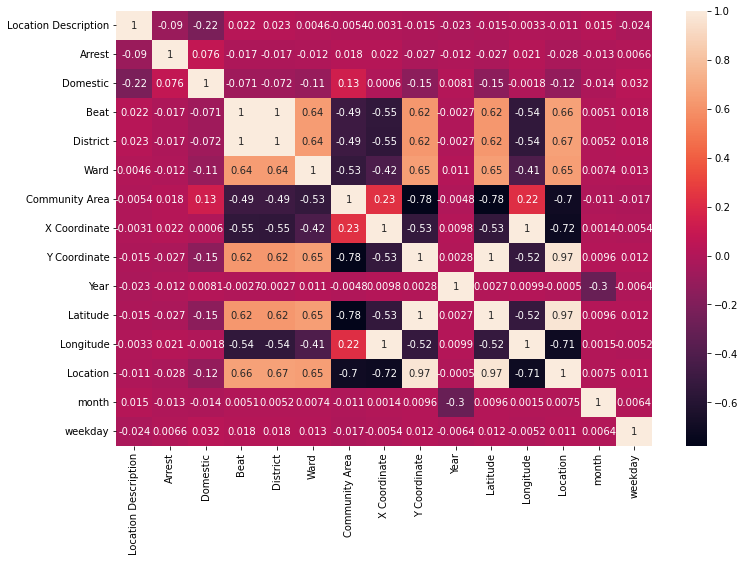

In [97]:
plt.figure(figsize=(12,8))
sns.heatmap(corelation,annot=True)

In [98]:
cp_crime

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
0,1310,0.793651,1,0,0.253300,7.0,15.0,67.0,14,0.653182,0.337029,2016,41.772186,-87.664327,-0.066923,2,9,4
1,560,0.738095,0,1,0.165017,5.0,9.0,49.0,08A,0.737370,0.178207,2015,41.711995,-87.630836,-0.135721,3,7,1
2,1320,0.706349,0,0,0.957508,24.0,40.0,1.0,14,0.632097,0.946120,2015,42.002282,-87.670506,0.142113,2,9,6
3,486,0.134921,1,1,0.252063,7.0,20.0,68.0,08B,0.724066,0.357917,2015,41.779904,-87.635492,-0.072774,1,11,2
4,810,0.436508,0,0,0.214934,6.0,6.0,44.0,6,0.784628,0.251558,2016,41.739581,-87.611376,-0.119607,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,460,0.873016,0,0,0.990512,25.0,36.0,19.0,08B,0.351066,0.744053,2018,41.926567,-87.785557,0.125183,1,12,1
239996,460,0.896825,0,0,0.000413,1.0,42.0,32.0,08B,0.736493,0.622611,2018,41.879846,-87.629356,0.014115,1,6,3
239997,486,0.134921,1,1,0.042079,2.0,3.0,35.0,08B,0.753376,0.477332,2018,41.824933,-87.623105,-0.037887,1,6,5
239998,820,0.428571,1,0,0.214934,6.0,6.0,44.0,6,0.800761,0.246821,2018,41.737751,-87.604856,-0.124135,0,6,5


In [99]:
# month week day have low correlation they isn't effect our results so we drop them
# since beat have high correlation with district so we drop beat
# and X cordinate have high correlation with longitube and Y cordinate with latitude and location so we drop longitude and latitude
# 'Beat'
selected_cols=['Location Description','Arrest','Domestic','Beat','Ward','Community Area','X Coordinate','Y Coordinate','Year','crimeType'] 


In [100]:
cp_crime = cp_crime.sample(frac=1)
cp_crime

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,crimeType,month,weekday
67246,486,0.134921,0,1,0.334983,9.0,14.0,63.0,08B,0.561502,0.405854,2015,41.798392,-87.701257,-0.027072,1,9,1
223713,520,0.738095,0,0,0.294142,8.0,16.0,63.0,04A,0.594436,0.374555,2018,41.786495,-87.688012,-0.043603,3,12,6
12979,1320,0.896825,0,0,0.292904,8.0,14.0,58.0,14,0.545216,0.439021,2016,41.810955,-87.707744,-0.012935,2,2,4
61513,520,0.150794,0,0,0.990512,25.0,36.0,19.0,04A,0.349294,0.736381,2016,41.923673,-87.786302,0.122917,3,1,3
156047,486,0.134921,0,0,0.455446,12.0,27.0,24.0,08B,0.652622,0.657965,2017,41.893402,-87.663292,0.041299,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149867,560,0.428571,1,0,0.706683,18.0,42.0,8.0,08A,0.729796,0.686242,2017,41.903895,-87.631814,0.036765,3,4,0
198573,486,0.738095,0,1,0.042079,2.0,3.0,38.0,08B,0.753674,0.458398,2019,41.817781,-87.623063,-0.044318,1,1,6
17183,460,0.865079,0,0,0.248762,7.0,15.0,67.0,08B,0.649694,0.374322,2016,41.786280,-87.665596,-0.053725,1,2,3
155667,1320,0.896825,0,0,0.582921,15.0,37.0,25.0,14,0.409866,0.665296,2016,41.896704,-87.761915,0.087938,2,10,6


In [101]:
cp_crime = cp_crime[selected_cols]
cp_crime

,Location Description,Arrest,Domestic,Beat,Ward,Community Area,X Coordinate,Y Coordinate,Year,crimeType
67246,0.134921,0,1,0.334983,14.0,63.0,0.561502,0.405854,2015,1
223713,0.738095,0,0,0.294142,16.0,63.0,0.594436,0.374555,2018,3
12979,0.896825,0,0,0.292904,14.0,58.0,0.545216,0.439021,2016,2
61513,0.150794,0,0,0.990512,36.0,19.0,0.349294,0.736381,2016,3
156047,0.134921,0,0,0.455446,27.0,24.0,0.652622,0.657965,2017,1
...,...,...,...,...,...,...,...,...,...,...
149867,0.428571,1,0,0.706683,42.0,8.0,0.729796,0.686242,2017,3
198573,0.738095,0,1,0.042079,3.0,38.0,0.753674,0.458398,2019,1
17183,0.865079,0,0,0.248762,15.0,67.0,0.649694,0.374322,2016,1
155667,0.896825,0,0,0.582921,37.0,25.0,0.409866,0.665296,2016,2


In [102]:
from sklearn.model_selection import train_test_split
# Split the data into 70% train and 30% test 
train_df, temp_test_df =  train_test_split(cp_crime, test_size=0.3)

print( train_df.shape )
print( temp_test_df.shape )

(168000, 10)
(72000, 10)


In [103]:
# Split the test_dataset dataframe to 50% test and 50% validation. 
test_df, valid_df =  train_test_split(temp_test_df, test_size=0.5)
print( test_df.shape )
print( valid_df.shape )

(36000, 10)
(36000, 10)


In [104]:
print(f" Shape of Train dataset       : {train_df.shape}")
print(f" Shape of Test dataset        : {test_df.shape}")
print(f" Shape of Validation dataset  : {valid_df.shape}")

 Shape of Train dataset       : (168000, 10)
 Shape of Test dataset        : (36000, 10)
 Shape of Validation dataset  : (36000, 10)


In [105]:
train_df

,Location Description,Arrest,Domestic,Beat,Ward,Community Area,X Coordinate,Y Coordinate,Year,crimeType
29921,0.896825,0,0,0.747937,44.0,6.0,0.663512,0.785851,2016,2
72686,0.134921,0,0,0.586634,28.0,25.0,0.441227,0.616530,2016,1
102341,0.428571,1,0,0.660066,50.0,13.0,0.524258,0.925551,2016,0
535,0.134921,0,0,0.957096,49.0,1.0,0.636986,0.964145,2015,3
218572,0.849206,1,0,0.742987,47.0,6.0,0.636842,0.820645,2018,1
...,...,...,...,...,...,...,...,...,...,...
7379,0.444444,0,0,0.128713,10.0,46.0,0.933283,0.225040,2016,0
234880,0.873016,0,0,0.165017,8.0,50.0,0.841946,0.202807,2018,0
183233,0.865079,0,0,0.788366,48.0,77.0,0.669902,0.904467,2018,1
238365,0.896825,0,0,0.334571,15.0,58.0,0.601594,0.442305,2019,0


In [106]:
# Statistics on the train dataset to make sure it is in a good shape.
train_stats = train_df.describe()

train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Location Description,168000.0,0.647156,0.282236,0.000000,0.428571,0.738095,0.873016,1.0
Arrest,168000.0,0.138631,0.345562,0.000000,0.000000,0.000000,0.000000,1.0
Domestic,168000.0,0.217601,0.412616,0.000000,0.000000,0.000000,0.000000,1.0
Beat,168000.0,0.424291,0.289670,0.000000,0.174092,0.376650,0.665017,1.0
Ward,168000.0,23.302518,14.310698,1.000000,10.000000,24.000000,35.000000,50.0
Community Area,168000.0,36.458315,21.479546,1.000000,22.000000,32.000000,53.000000,77.0
X Coordinate,168000.0,0.641307,0.144857,0.000000,0.539222,0.657891,0.742440,1.0
Y Coordinate,168000.0,0.529103,0.227500,0.000094,0.330655,0.582710,0.695222,1.0
Year,168000.0,2016.956661,1.216790,2015.000000,2016.000000,2017.000000,2018.000000,2020.0


In [107]:
# stroing the target labebls 
train_labels1 = train_df.pop('crimeType')

In [108]:
train_labels1

29921     2
72686     1
102341    0
535       3
218572    1
         ..
7379      0
234880    0
183233    1
238365    0
233400    0
Name: crimeType, Length: 168000, dtype: object

In [109]:
test_labels1 = test_df.pop('crimeType')
test_labels1

126271    2
152116    2
129435    0
233338    3
44147     0
         ..
99147     1
30922     0
191611    2
210288    0
8951      1
Name: crimeType, Length: 36000, dtype: object

In [110]:
valid_labels1 = valid_df.pop('crimeType')
valid_labels1

102877    1
27432     1
25695     0
60223     0
139722    2
         ..
47051     1
19931     2
185317    0
90874     1
65756     1
Name: crimeType, Length: 36000, dtype: object

In [111]:
# scalled_train_data

In [112]:
# Encode the labeles
train_labels = pd.get_dummies(train_labels1, prefix='Label')
valid_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')

train_labels

,Label_0,Label_1,Label_2,Label_3
29921,0,0,1,0
72686,0,1,0,0
102341,1,0,0,0
535,0,0,0,1
218572,0,1,0,0
...,...,...,...,...
7379,1,0,0,0
234880,1,0,0,0
183233,0,1,0,0
238365,1,0,0,0


In [113]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scalled_train_data = sc.fit_transform(train_df)
scalled_test_data = sc.fit_transform(test_df)
scalled_valid_data = sc.fit_transform(valid_df)

In [114]:
scalled_train_data

array([[ 0.88461782, -0.40117649, -0.52737136, ...,  0.15329079,
         1.128569  , -0.78621937],
       [-1.814925  , -0.40117649, -0.52737136, ..., -1.38123273,
         0.38429851, -0.78621937],
       [-0.77447621,  2.49266851, -0.52737136, ..., -0.80804031,
         1.74263607, -0.78621937],
       ...,
       [ 0.77213687, -0.40117649, -0.52737136, ...,  0.19740172,
         1.64995755,  0.85745505],
       [ 0.88461782, -0.40117649, -0.52737136, ..., -0.27415465,
        -0.38152884,  1.67929226],
       [ 0.77213687, -0.40117649, -0.52737136, ..., -1.0505568 ,
        -0.01078281,  0.85745505]])

In [115]:
# Tensorflow and Keras are two packages for creating neural network models.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers

In [116]:
#  Creating a model.
def build_model():
    model = Sequential()
    model.add(Dense(520,activation='relu', input_shape = (scalled_train_data.shape[1],)  ))        #18
    model.add(Dropout(0.1))
    model.add(Dense(490,  activation='relu'))         #17
    model.add(Dropout(0.1))
    model.add(Dense(460,  activation='relu'))        #16
    model.add(Dropout(0.1))
    model.add(Dense(430,  activation='relu'))         #15
    model.add(Dropout(0.1))
    model.add(Dense(400,  activation='relu'))        #14
    model.add(Dropout(0.1))
    model.add(Dense(370,  activation='relu'))        #13
    model.add(Dropout(0.1))
    model.add(Dense(340,  activation='relu'))         #12
    model.add(Dropout(0.1))
    model.add(Dense(310,  activation='relu'))        #11
    model.add(Dropout(0.1))
    model.add(Dense(280,  activation='relu'))        #10
    model.add(Dropout(0.1))
    model.add(Dense(250,  activation='relu'))        #9
    model.add(Dropout(0.1))
    model.add(Dense(220,  activation='relu'))        #8
    model.add(Dropout(0.1))
    model.add(Dense(190,  activation='relu'))           #7
    model.add(Dropout(0.1))
    model.add(Dense(160,  activation='relu'))          #6
    model.add(Dropout(0.1))
    model.add(Dense(130,  activation='relu'))          #5
    model.add(Dropout(0.1))
    model.add(Dense(100,  activation='relu'))             #4
    model.add(Dropout(0.1))
    model.add(Dense(70,  activation='relu'))             #3
    model.add(Dropout(0.1))
    model.add(Dense(40,  activation='relu'))            #2
    model.add(Dropout(0.1))
    model.add(Dense(4, activation='softmax'))           #1                          
   
    learning_rate = 0.01
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model

In [117]:
model = build_model()
print('Here is a summary of this model: ')
model.summary()

Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 520)               5200      
_________________________________________________________________
dropout_17 (Dropout)         (None, 520)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 490)               255290    
_________________________________________________________________
dropout_18 (Dropout)         (None, 490)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 460)               225860    
_________________________________________________________________
dropout_19 (Dropout)         (None, 460)               0         
_________________________________________________________________
dense_21 (Dense)    

In [118]:
# def FindBatchSize(model):
#     """#model: model architecture, that is yet to be trained"""
#     import os, sys, psutil, gc, tensorflow, keras
#     import numpy as np
#     from keras import backend as K
#     BatchFound= 16

#     try:
#         total_params= int(model.count_params());    GCPU= "CPU"
#         #find whether gpu is available
#         try:
#             if K.tensorflow_backend._get_available_gpus()== []:
#                 GCPU= "CPU";    #CPU and Cuda9GPU
#             else:
#                 GCPU= "GPU"
#         except:
#             from tensorflow.python.client import device_lib;    #Cuda8GPU
#             def get_available_gpus():
#                 local_device_protos= device_lib.list_local_devices()
#                 return [x.name for x in local_device_protos if x.device_type == 'GPU']
#             if "gpu" not in str(get_available_gpus()).lower():
#                 GCPU= "CPU"
#             else:
#                 GCPU= "GPU"

#         #decide batch size on the basis of GPU availability and model complexity
#         if (GCPU== "GPU") and (os.cpu_count() >15) and (total_params <1000000):
#             BatchFound= 64    
#         if (os.cpu_count() <16) and (total_params <500000):
#             BatchFound= 64  
#         if (GCPU== "GPU") and (os.cpu_count() >15) and (total_params <2000000) and (total_params >=1000000):
#             BatchFound= 32      
#         if (GCPU== "GPU") and (os.cpu_count() >15) and (total_params >=2000000) and (total_params <10000000):
#             BatchFound= 16  
#         if (GCPU== "GPU") and (os.cpu_count() >15) and (total_params >=10000000):
#             BatchFound= 8       
#         if (os.cpu_count() <16) and (total_params >5000000):
#             BatchFound= 8    
#         if total_params >100000000:
#             BatchFound= 1

#     except:
#         pass
#     try:

#         #find percentage of memory used
#         memoryused= psutil.virtual_memory()
#         memoryused= float(str(memoryused).replace(" ", "").split("percent=")[1].split(",")[0])
#         if memoryused >75.0:
#             BatchFound= 8
#         if memoryused >85.0:
#             BatchFound= 4
#         if memoryused >90.0:
#             BatchFound= 2
#         if total_params >100000000:
#             BatchFound= 1
#         print("Batch Size:  "+ str(BatchFound));    gc.collect()
#     except:
#         pass

#     memoryused= [];    total_params= [];    GCPU= "";
#     del memoryused, total_params, GCPU;    gc.collect()
#     return BatchFound

In [119]:
# NO
# FindBatchSize(model)
# from tensorflow.keras.utils import plot_model

In [120]:
# NO
# plot_model(model, to_file= 'crime_model.png' , show_shapes=True, show_layer_names=True, )

In [121]:
# # $ pip3 install keras
# # $ pip3 install ann_visualizer
# # !pip install graphviz
# !pip install h5py

In [122]:
# NO
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
    
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

In [123]:
# NO
# from ann_visualizer.visualize import ann_viz;
# from keras.models import model_from_json
# import numpy

# # fix random seed for reproducibility
# numpy.random.seed(7)

# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)

# # load weights into new model
# model.load_weights("model.h5")
# ann_viz(model, title=" Crime Prediction Model ", )

In [124]:
%%time

EPOCHS = 100
batch_size = 16800


with tf.device('/GPU:0'): # use to train with a GPU, if available.
    history = model.fit(
        scalled_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,   
        validation_data = (scalled_valid_data, valid_labels),  
    )

Epoch 1/100
10/10 [==============================] - 12s 1s/step - loss: 1.4907 - accuracy: 0.3421 - val_loss: 1.3108 - val_accuracy: 0.3890
Epoch 2/100
10/10 [==============================] - 11s 1s/step - loss: 1.3026 - accuracy: 0.3873 - val_loss: 1.2959 - val_accuracy: 0.3890
Epoch 3/100
10/10 [==============================] - 11s 1s/step - loss: 1.2957 - accuracy: 0.3880 - val_loss: 1.2840 - val_accuracy: 0.3890
Epoch 4/100
10/10 [==============================] - 13s 1s/step - loss: 1.2782 - accuracy: 0.4502 - val_loss: 1.3434 - val_accuracy: 0.3890
Epoch 5/100
10/10 [==============================] - 12s 1s/step - loss: 1.3133 - accuracy: 0.3474 - val_loss: 1.3044 - val_accuracy: 0.3089
Epoch 6/100
10/10 [==============================] - 11s 1s/step - loss: 1.2987 - accuracy: 0.3677 - val_loss: 1.2949 - val_accuracy: 0.3890
Epoch 7/100
10/10 [==============================] - 11s 1s/step - loss: 1.2964 - accuracy: 0.3880 - val_loss: 1.2941 - val_accuracy: 0.3890
Epoch 8/100
1

In [125]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
95,1.294170,0.388018,1.293944,0.388972,95
96,1.294151,0.388018,1.293936,0.388972,96
97,1.294126,0.388018,1.293945,0.388972,97
98,1.294145,0.388018,1.293952,0.388972,98
99,1.294146,0.388018,1.293941,0.388972,99


In [126]:
example_batch = scalled_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([[0.38815302, 0.310042  , 0.18361667, 0.1181883 ],
       [0.38815302, 0.310042  , 0.18361667, 0.1181883 ],
       [0.38815302, 0.310042  , 0.18361667, 0.1181883 ],
       [0.38815302, 0.310042  , 0.18361667, 0.1181883 ],
       [0.38815302, 0.310042  , 0.18361667, 0.1181883 ],
       [0.38815302, 0.310042  , 0.18361667, 0.1181883 ],
       [0.38815302, 0.310042  , 0.18361667, 0.1181883 ],
       [0.38815302, 0.310042  , 0.18361667, 0.1181883 ],
       [0.38815302, 0.310042  , 0.18361667, 0.1181883 ],
       [0.38815302, 0.310042  , 0.18361667, 0.1181883 ]], dtype=float32)

In [127]:
# NO
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score

In [128]:
# No
# # predict probabilities for test set
# # yhat_probs = model.predict(scalled_test_data, verbose=0)
# # predict crisp classes for test set
# predict_x=model.predict(scalled_test_data)
# classes_x=np.argmax(predict_x,axis=1)
# # np.argmax(predict_x,axis=1)
# # yhat_classes = model.predict_classes(scalled_test_data, verbose=0)

In [129]:
# NO
# predict_x

In [130]:
# No
# # reduce to 1d array
# yhat_probs = yhat_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]

In [131]:
# NO
# # accuracy: (tp + tn) / (p + n)
# # accuracy = accuracy_score(scalled_test_data, yhat_classes)
# # print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(scalled_test_data, classes_x)
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(scalled_test_data, classes_x)
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(scalled_test_data, classes_x)
# print('F1 score: %f' % f1)

In [132]:
from sklearn.metrics import classification_report

In [133]:
# NO
# # model_json = model.to_json()
# # with open("model.json", "w") as json_file:
# #     json_file.write(model_json)# serialize weights to HDF5
# # model.save_weights("model.h5")
# # print("Saved model to disk")
# print(classification_report(scalled_test_data, test_labels))

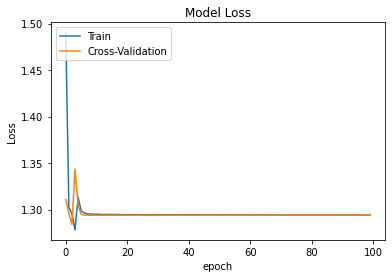

In [134]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

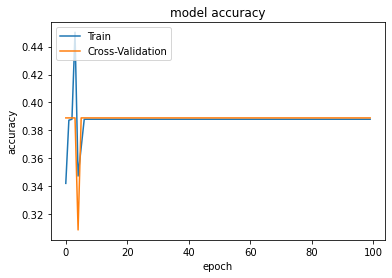

In [135]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [136]:
%%time

print('Train Split: ')
loss, accuracy = model.evaluate(scalled_train_data, train_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))


Train Split: 
5250/5250 [==============================] - 31s 6ms/step - loss: 1.2941 - accuracy: 0.3880
Accuracy   :  0.39 
CPU times: user 1min 42s, sys: 2min 8s, total: 3min 51s
Wall time: 41.2 s


In [137]:
%%time

print('Evaluation Split: ')
loss, accuracy =  model.evaluate(scalled_valid_data, valid_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
1125/1125 - 7s - loss: 1.2939 - accuracy: 0.3890
Accuracy   :  0.39 
CPU times: user 26.6 s, sys: 30.8 s, total: 57.5 s
Wall time: 10.3 s


In [ ]:
%%time

print('Test Split: ')
loss, accuracy =  model.evaluate(scalled_test_data, test_labels, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 


In [82]:
# 1D CNN

In [297]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from tensorflow.keras import layers
# from keras.layers import layers

In [298]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scalled_train_data = sc.fit_transform(train_df)

scalled_test_data = sc.fit_transform(test_df)
scalled_valid_data = sc.fit_transform(valid_df)

In [303]:
def build_model1D():
    model1d = Sequential()
    model1d.add(Conv1D(filters=84, kernel_size=3, activation='relu', input_shape=(scalled_train_data.shape[1],1)))
    model1d.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model1d.add(MaxPooling1D(pool_size=2))
    model1d.add(Flatten())
    model1d.add(Dense(120, activation='relu'))
    model1d.add(Dense(4, activation='softmax'))

     
   
    learning_rate = 0.01
    optimizer = optimizers.Adam(learning_rate)
    model1d.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model1d

In [304]:
model1d = build_model1D()

model1d.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_92 (Conv1D)           (None, 7, 84)             336       
_________________________________________________________________
conv1d_93 (Conv1D)           (None, 5, 64)             16192     
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 120)               15480     
_________________________________________________________________
dense_97 (Dense)             (None, 4)                 484       
Total params: 32,492
Trainable params: 32,492
Non-trainable params: 0
_________________________________________________

In [305]:
# def build_modelLSTM():
#     lstm = keras.Sequential([
#         layers.LSTM(512, activation='relu', input_shape=(scalled_train_data.shape[1],1)),
#         layers.Dropout(0.4),
#         layers.Dense(512, activation='relu'),
#         layers.Dropout(0.4),
#         layers.Dense(512, activation='relu'),
#         layers.Dropout(0.4),
#         layers.Dense(512, activation='softmax'),
#         layers.Dropout(0.4),
#         layers.Dense(4)
#     ])

#     learning_rate = 0.01
#     optimizer = optimizers.Adam(learning_rate)
#     lstm.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    
#     return lstm

In [ ]:
# lstm = build_modelLSTM()

# lstm.summary()

In [157]:
scalled_train_data.shape

(168000, 9)

In [158]:
train_labels.shape

(168000, 4)

In [306]:
scalled_train_data=np.expand_dims(scalled_train_data, axis=-1)
scalled_test_data=np.expand_dims(scalled_test_data, axis=-1)
scalled_valid_data=np.expand_dims(scalled_valid_data, axis=-1)
# X_test=np.expand_dims(X_test, axis=-1)

In [307]:
EPOCHS = 100
batch_size = 16800


with tf.device('/GPU:0'): # use to train with a GPU, if available.
    history = model1d.fit(
        scalled_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,   
        validation_data = (scalled_valid_data, valid_labels),  
    )
    

Epoch 1/100
10/10 [==============================] - 2s 184ms/step - loss: 1.2147 - accuracy: 0.4750 - val_loss: 1.1619 - val_accuracy: 0.5202
Epoch 2/100
10/10 [==============================] - 2s 167ms/step - loss: 1.1473 - accuracy: 0.5281 - val_loss: 1.1446 - val_accuracy: 0.5251
Epoch 3/100
10/10 [==============================] - 2s 171ms/step - loss: 1.1366 - accuracy: 0.5310 - val_loss: 1.1380 - val_accuracy: 0.5273
Epoch 4/100
10/10 [==============================] - 2s 167ms/step - loss: 1.1295 - accuracy: 0.5341 - val_loss: 1.1327 - val_accuracy: 0.5298
Epoch 5/100
10/10 [==============================] - 2s 179ms/step - loss: 1.1235 - accuracy: 0.5373 - val_loss: 1.1261 - val_accuracy: 0.5328
Epoch 6/100
10/10 [==============================] - 2s 181ms/step - loss: 1.1183 - accuracy: 0.5388 - val_loss: 1.1215 - val_accuracy: 0.5365
Epoch 7/100
10/10 [==============================] - 2s 179ms/step - loss: 1.1131 - accuracy: 0.5415 - val_loss: 1.1170 - val_accuracy: 0.5366

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)